In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get Data by reading CSV file

In [2]:
titanic_data = pd.read_csv('titanic-data/titanic_data.csv')

- Get basic information of titanic_data.csv file
- we can see Age Colum has only 714 rows thats mean there are empty rows in Age


In [3]:

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- Generate various summary statistics of titanic data, excluding NaN values.

In [4]:
titanic_data.describe()

/Users/BIKESHKAWAN/anaconda/envs/python2env/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
## all the list of columns in csv file
titanic_data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

###### Get First Five rows of Age Column

In [6]:
titanic_data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

##### Getting last 5 rows

In [7]:
titanic_data['Age'].tail()

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

# Replacing NaN Values with Average age

- first making copy of original dataframe
- replace age less than a year by 1
- replace NaN by average age of passenger



In [8]:
## copying original data set 
titanic_df2 = titanic_data.copy()


In [9]:
# first 6 rows to shown Nan
titanic_df2['Age'].head(6)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
Name: Age, dtype: float64

In [10]:
less_than_year = titanic_data['Age'] <1

In [11]:
#rows showing Age column less than a year
titanic_data[less_than_year]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [12]:
# replacing all the rows of Age Column whose value is less than 1 by 1
titanic_df2['Age'][titanic_df2['Age'] <1] = 1

/Users/BIKESHKAWAN/anaconda/envs/python2env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
## successffully replaced Age with less than 1 by value 1
titanic_df2[less_than_year]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,1.0,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,1.0,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,1.0,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,1.0,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,1.0,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,1.0,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,1.0,1,1,29106,18.7500,NaN,S


In [14]:
## Missing Data in Age column can be seen
titanic_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
 ## average age of passengers  and rounding 
avg_age = round(titanic_df2['Age'].mean())
avg_age

30.0

In [16]:
## filling NAN with average age of passengers
titanic_df2['Age'] = titanic_df2['Age'].fillna(avg_age)


In [17]:
## all NAN in Age column have been filled by Average age
titanic_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [18]:
titanic_df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.760943,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,12.997994,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
titanic_data['Age'].tail() # before filling NaN

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

In [20]:
titanic_df2['Age'].tail()## after filling NAN with average age 

886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, dtype: float64

###  Death And Survivor based on Passenger's Class

In [21]:
titanic_df2.groupby(['Pclass','Survived'])['PassengerId'].count()


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

## Plotting Death and Survivor based  on Passengers's Class into Pie Chart

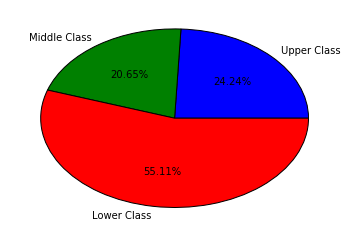

In [22]:
plt.figure()
labels = ['Upper Class','Middle Class','Lower Class']
plt.pie(titanic_df2.groupby(['Pclass'])['Survived'].count(),labels=labels , autopct='%.2f%%')
plt.show()

## Plotting Death and Survivor based  on Passengers's Class into Bar Chart

In [23]:
# Unstack, a.k.a. pivot, Series with MultiIndex to produce DataFrame.
# The level involved will automatically get sorted.

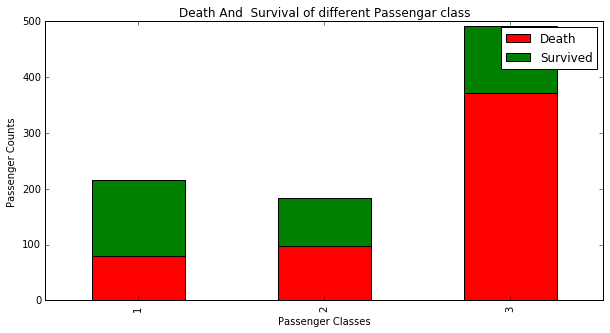

In [24]:
pclass_subset_df = titanic_df2.groupby(['Pclass','Survived'])['PassengerId'].count()
pclass_subset_df.unstack().plot(kind='bar',figsize=(10,5),stacked=True,color=['red','green'],title="Death And  Survival of different Passengar class")
plt.xlabel('Passenger Classes')
plt.ylabel('Passenger Counts')
plt.legend(labels=['Death','Survived'])



In [25]:
titanic_df2.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

# Survival  Data of Passenger based on Siblings

In [26]:
sibsp_subset_df = titanic_df2.groupby(['SibSp','Survived'])['PassengerId'].count()
sibsp_subset_df

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64

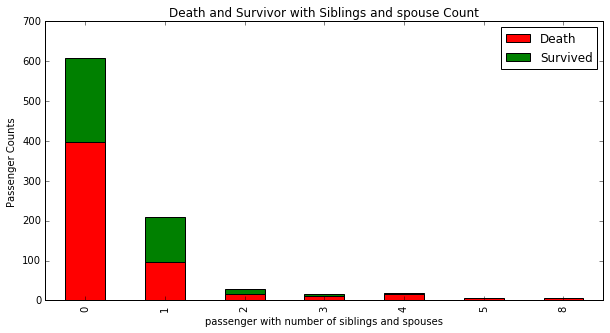

In [27]:
sibsp_subset_df.unstack().plot(figsize =(10,5),kind='bar',stacked=True,color=['red','green'],title="Death and Survivor with Siblings and spouse Count")
plt.legend(labels=['Death','Survived'])
plt.xlabel("passenger with number of siblings and spouses")
plt.ylabel('Passenger Counts')

 # Survival  Data of Passenger based on Parent and Child

In [28]:
parch_subset_df = titanic_df2.groupby(['Parch','Survived'])['PassengerId'].count()
parch_subset_df

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64

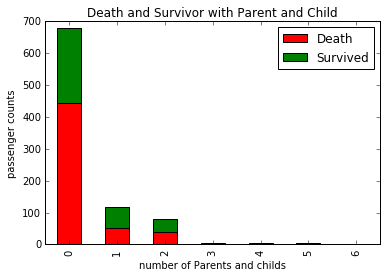

In [29]:
plt.figure()
parch_subset_df.unstack().plot(kind='bar',stacked=True,title='Death and Survivor with Parent and Child',color=['Red','Green'])
plt.legend(labels=['Death','Survived'])
plt.xlabel("number of Parents and childs")
plt.ylabel('passenger counts')
plt.show()

# Survival  Data of Passenger based on Gender

In [30]:
gender_subset_df = titanic_df2.groupby(['Sex','Survived']).PassengerId.count()
gender_subset_df

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

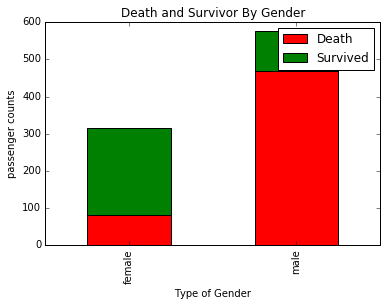

In [31]:
plt.figure()
gender_subset_df.unstack().plot(kind='bar',stacked=True,title='Death and Survivor By Gender',color=['Red','Green'])
plt.legend(labels=['Death','Survived'])
plt.xlabel("Type of Gender")
plt.ylabel('passenger counts')
plt.show()

# Line graph : Survival Data of Passengers based on age 

In [32]:
age_subset_df = titanic_df2.groupby(['Age','Survived']).PassengerId.count()
age_subset_df.head()

Age  Survived
1.0  0            2
     1           12
2.0  0            7
     1            3
3.0  0            1
Name: PassengerId, dtype: int64

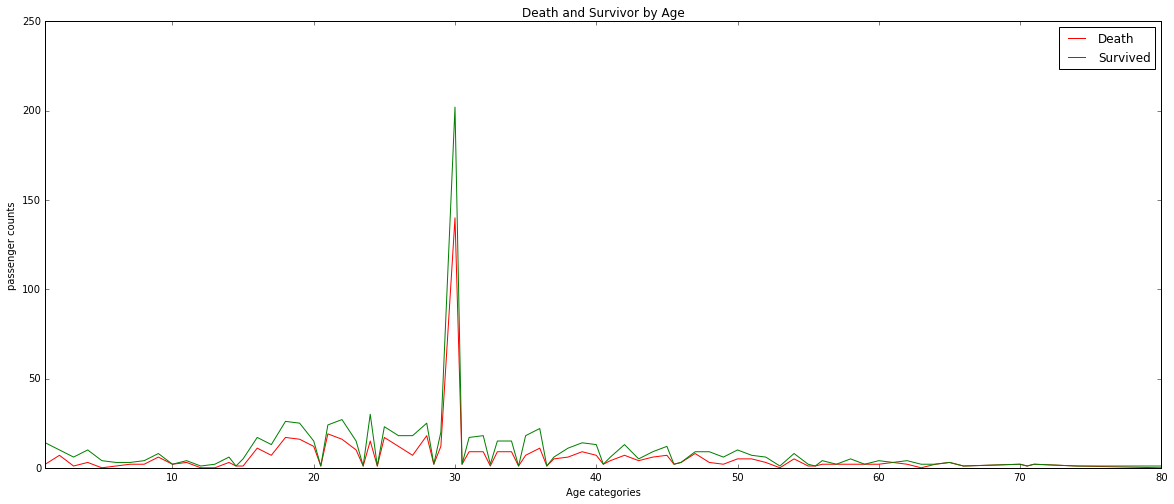

In [46]:
plt.figure()
age_subset_df.unstack().plot(figsize =(20,8),kind='line',stacked=True,title='Death and Survivor by Age',color=['Red','Green'])
plt.legend(labels=['Death','Survived'])
plt.xlabel("Age categories")
plt.ylabel('passenger counts')
plt.show()

## line graph showing Fare 

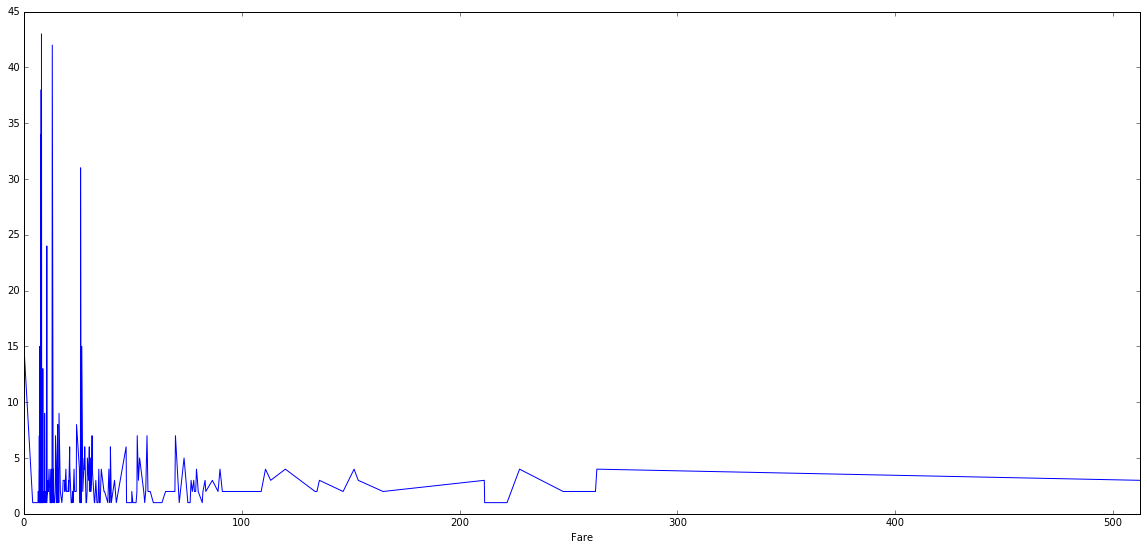

In [45]:
titanic_df2.groupby(['Fare'])['PassengerId'].count().plot(kind='line',figsize=(20,9))